In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from sqlalchemy import create_engine
from datetime import date, timedelta
import calendar

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from itables import show
pd.options.display.max_rows = 31

engine = create_engine("sqlite:///c:\\ruby\\expense\\db\\development.sqlite3")
conn = engine.connect()

In [2]:
sql = "SELECT C.name AS item, G.name AS kind FROM categories C \
       JOIN groups G ON group_id = G.id"
df_c = pd.read_sql(sql, conn)
df_c.head()

,item,kind
0,Books & Software,Edutainment
1,CCF,Luxury
2,Cigarette,Luxury
3,Food,Food
4,Fuel,Transportation


In [3]:
month = date(2022, 2, 1)
bom = month
eom = month.replace(day=calendar.monthrange(month.year, month.month)[1])
bom, eom

(datetime.date(2022, 2, 1), datetime.date(2022, 2, 28))

In [4]:
bom
eom

datetime.date(2022, 2, 1)

datetime.date(2022, 2, 28)

In [5]:
sql = """
SELECT date,amount,C.name AS item, G.name AS kind FROM transactions T 
JOIN categories C ON category_id = C.id 
JOIN groups G ON group_id = G.id 
WHERE date = "%s" 
ORDER BY amount DESC
"""
sql = sql % eom
print(sql)


SELECT date,amount,C.name AS item, G.name AS kind FROM transactions T 
JOIN categories C ON category_id = C.id 
JOIN groups G ON group_id = G.id 
WHERE date = "2022-02-28" 
ORDER BY amount DESC



In [6]:
df = pd.read_sql(sql, conn)
df

,date,amount,item,kind
0,2022-02-28,10000,Parent,Parent
1,2022-02-28,1360,Fuel,Transportation
2,2022-02-28,640,Internet Home,Communication
3,2022-02-28,600,CCF,Luxury
4,2022-02-28,400,Apple,Edutainment
5,2022-02-28,340,Packt,Edutainment
6,2022-02-28,320,Telephone Dtac,Communication
7,2022-02-28,190,Monthly Prime,Movies
8,2022-02-28,170,Google,Edutainment
9,2022-02-28,100,Apple,Edutainment


In [7]:
sql = """
SELECT date,amount,C.name AS item, G.name AS kind FROM transactions T 
JOIN categories C ON category_id = C.id 
JOIN groups G ON group_id = G.id 
WHERE date = "%s" 
ORDER BY amount DESC
"""
sql = sql % (eom)
print(sql)


SELECT date,amount,C.name AS item, G.name AS kind FROM transactions T 
JOIN categories C ON category_id = C.id 
JOIN groups G ON group_id = G.id 
WHERE date = "2022-02-28" 
ORDER BY amount DESC



In [8]:
df_eom = pd.read_sql(sql, conn)
df_eom

,date,amount,item,kind
0,2022-02-28,10000,Parent,Parent
1,2022-02-28,1360,Fuel,Transportation
2,2022-02-28,640,Internet Home,Communication
3,2022-02-28,600,CCF,Luxury
4,2022-02-28,400,Apple,Edutainment
5,2022-02-28,340,Packt,Edutainment
6,2022-02-28,320,Telephone Dtac,Communication
7,2022-02-28,190,Monthly Prime,Movies
8,2022-02-28,170,Google,Edutainment
9,2022-02-28,100,Apple,Edutainment


In [9]:
sql = """
SELECT date,amount,C.name AS item, G.name AS kind FROM transactions T 
JOIN categories C ON category_id = C.id 
JOIN groups G ON group_id = G.id 
WHERE date BETWEEN "%s" AND "%s" 
ORDER BY date
"""
sql = sql % (bom, eom)
print(sql)


SELECT date,amount,C.name AS item, G.name AS kind FROM transactions T 
JOIN categories C ON category_id = C.id 
JOIN groups G ON group_id = G.id 
WHERE date BETWEEN "2022-02-01" AND "2022-02-28" 
ORDER BY date



In [10]:
df_t = pd.read_sql(sql, conn)
df_t.head()

,date,amount,item,kind
0,2022-02-01,2930,Pets,Pets
1,2022-02-03,520,Food,Food
2,2022-02-05,420,Food,Food
3,2022-02-06,1120,Pets,Pets
4,2022-02-10,230,Food,Food


In [11]:
grouped = df_t.groupby("item")
grouped['amount'].sum()

item
Apple                 540
Books & Software      710
CCF                   600
Food                 3270
Fuel                 2670
Google                170
Internet Home         640
Medicine              380
Monthly Prime         190
Packt                 340
Parent              10000
Patreon                70
Pets                 6740
Telephone Dtac        320
Vehicle               520
Name: amount, dtype: int64

In [12]:
grouped = df_t.groupby("kind")
grouped['amount'].sum()

kind
Communication       960
Edutainment        1830
Food               3270
Luxury              600
Medicine            380
Movies              190
Parent            10000
Pets               6740
Transportation     3190
Name: amount, dtype: int64

In [13]:
expense = grouped.amount.sum()
sum(expense)

27160

<Figure size 864x864 with 0 Axes>

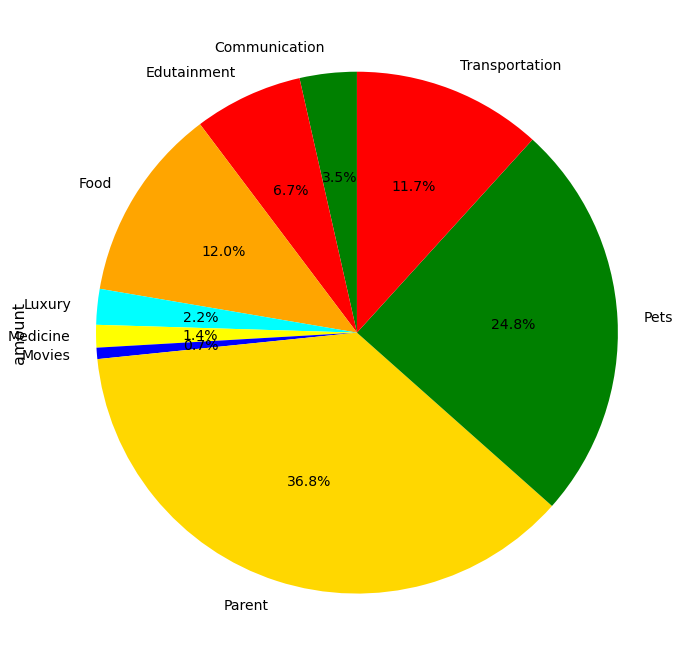

In [14]:
fig_path = "../fig/Expense-2202.png"
with plt.style.context("my_custom_style"):
    plt.figure(figsize=(12, 12))
    ax = expense.plot.pie(
        colors=["green", "red", "orange", "cyan", "yellow", "blue", "gold"],
        startangle=90,
        autopct="%1.1f%%",
    )
    plt.savefig(fig_path)

In [15]:
expense.to_csv("../data/expense-2202.csv")

In [16]:
sql = """
SELECT date,amount,C.name AS item, G.name AS kind FROM transactions T 
JOIN categories C ON category_id = C.id 
JOIN groups G ON group_id = G.id 
WHERE date = "%s" 
ORDER BY date
"""
sql = sql % (eom)
print(sql)


SELECT date,amount,C.name AS item, G.name AS kind FROM transactions T 
JOIN categories C ON category_id = C.id 
JOIN groups G ON group_id = G.id 
WHERE date = "2022-02-28" 
ORDER BY date



In [17]:
df_tmp = pd.read_sql(sql, conn)
show(df_tmp[['date','amount','item','kind']])

<IPython.core.display.Javascript object>

date,amount,item,kind


In [18]:
df_tmp.to_csv("../data/expense-eom.csv")